<a href="https://colab.research.google.com/github/bafanaS/dim-reduction-with-cnn-lstm/blob/main/Dimensionality_Reduction_4_Classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning & Processing

In [1]:
import numpy as np
import pandas as pd

In [2]:

from matplotlib import rcParams # rcParams is a file that specifies Matplotlib style defaults
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [3]:
import os, requests

fname = 'motor_imagery.npz'
url = "https://osf.io/ksqv8/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [4]:
alldat = np.load(fname, allow_pickle=True)['dat']



In [5]:
current = 1

# Data Reformatting

Collecting data without taking the mean of the stimuli

In [6]:
num_dicts = alldat.shape[0]

arr_new_real = np.empty((1, 2, 30, 2000, 46))

arr_new_imag = np.empty((1, 2, 30, 2000, 46))

In [7]:

from scipy import signal
import numpy as np

num_dicts = alldat.shape[0]

for i in range(1):

    dat1 = alldat[current][0]
    V = dat1['V'].astype('float32')[:, :46]

    b, a = signal.butter(3, [50], btype='high', fs=1000)
    V = signal.filtfilt(b, a, V, 0)

    V = np.abs(V)**2
    b, a = signal.butter(3, [10], btype='low', fs=1000)
    V = signal.filtfilt(b, a, V, 0)

    V = V/V.mean(0)

    nt, nchan = V.shape
    nstim = len(dat1['t_on'])
    trange = np.arange(0, 2000)
    ts = dat1['t_on'][:, np.newaxis] + trange
    V_epochs = np.reshape(V[ts, :], (nstim, 2000, nchan))
    V_tongue = (V_epochs[dat1['stim_id'] == 11]).mean(0)
    V_hand = (V_epochs[dat1['stim_id'] == 12]).mean(0)


    arr_new_real[i][0] = V_tongue
    arr_new_real[i][1] = V_hand

# Create array for real movements. You'll do the same for imaginary.

from scipy import signal
import numpy as np

num_dicts = alldat.shape[0]

for i in range(1):

    dat1 = alldat[current][1]
    V = dat1['V'].astype('float32')[:,:46]


    b, a = signal.butter(3, [50], btype='high', fs=1000)
    V = signal.filtfilt(b, a, V, 0)

    V = np.abs(V)**2
    b, a = signal.butter(3, [10], btype='low', fs=1000)
    V = signal.filtfilt(b, a, V, 0)

    V = V/V.mean(0)

    nt, nchan = V.shape
    nstim = len(dat1['t_on'])
    trange = np.arange(0, 2000)
    ts = dat1['t_on'][:, np.newaxis] + trange
    V_epochs = np.reshape(V[ts, :], (nstim, 2000, nchan))
    V_tongue = (V_epochs[dat1['stim_id'] == 11])
    V_hand = (V_epochs[dat1['stim_id'] == 12])

    arr_new_imag[i][0] = V_tongue
    arr_new_imag[i][1] = V_hand

In [8]:
arr_new_real.shape


(1, 2, 30, 2000, 46)

### Initializing groups of data for dimensionality reduction

In [22]:
# 4 Groups
newrealtongue = arr_new_real[0][0].swapaxes(1,2).reshape(46*30, 2000)
newrealhand = arr_new_real[0][1].swapaxes(1,2).reshape(46*30, 2000)
newimagtongue = arr_new_imag[0][0].swapaxes(1,2).reshape(46*30, 2000)
newimaghand = arr_new_imag[0][1].swapaxes(1,2).reshape(46*30, 2000)

newrealtongue.shape


(1380, 2000)

In [36]:
# 2 Groups without taking a mean
print(arr_new_real.shape)
real_reshaped = arr_new_real.swapaxes(3, 4)
print(real_reshaped.shape)
real_final = real_reshaped.reshape(1 * 2 * 46 * 30 , 2000)
print(real_final.shape)


print(arr_new_imag.shape)
imag_reshaped = arr_new_imag.swapaxes(3, 4)
print(imag_reshaped.shape)
imag_final = imag_reshaped.reshape(1 * 2 * 46 * 30, 2000)
print(imag_final.shape)

(1, 2, 30, 2000, 46)
(1, 2, 30, 46, 2000)
(2760, 2000)
(1, 2, 30, 2000, 46)
(1, 2, 30, 46, 2000)
(2760, 2000)


## Data Reformatting

With taking the mean of the stimuli



In [51]:
num_dicts = alldat.shape[0]

arr_new_real = np.empty((1, 2, 2000, 46))

arr_new_imag = np.empty((1, 2, 2000, 46))

In [52]:

from scipy import signal
import numpy as np

num_dicts = alldat.shape[0]

for i in range(1):

    dat1 = alldat[current][0]
    V = dat1['V'].astype('float32')[:, :46]

    b, a = signal.butter(3, [50], btype='high', fs=1000)
    V = signal.filtfilt(b, a, V, 0)

    V = np.abs(V)**2
    b, a = signal.butter(3, [10], btype='low', fs=1000)
    V = signal.filtfilt(b, a, V, 0)

    V = V/V.mean(0)

    nt, nchan = V.shape
    nstim = len(dat1['t_on'])
    trange = np.arange(0, 2000)
    ts = dat1['t_on'][:, np.newaxis] + trange
    V_epochs = np.reshape(V[ts, :], (nstim, 2000, nchan))
    V_tongue = (V_epochs[dat1['stim_id'] == 11]).mean(0)
    V_hand = (V_epochs[dat1['stim_id'] == 12]).mean(0)


    arr_new_real[i][0] = V_tongue
    arr_new_real[i][1] = V_hand

# Create array for real movements. You'll do the same for imaginary.

from scipy import signal
import numpy as np

num_dicts = alldat.shape[0]

for i in range(1):

    dat1 = alldat[current][1]
    V = dat1['V'].astype('float32')[:,:46]


    b, a = signal.butter(3, [50], btype='high', fs=1000)
    V = signal.filtfilt(b, a, V, 0)

    V = np.abs(V)**2
    b, a = signal.butter(3, [10], btype='low', fs=1000)
    V = signal.filtfilt(b, a, V, 0)

    V = V/V.mean(0)

    nt, nchan = V.shape
    nstim = len(dat1['t_on'])
    trange = np.arange(0, 2000)
    ts = dat1['t_on'][:, np.newaxis] + trange
    V_epochs = np.reshape(V[ts, :], (nstim, 2000, nchan))
    V_tongue = (V_epochs[dat1['stim_id'] == 11]).mean(0)
    V_hand = (V_epochs[dat1['stim_id'] == 12]).mean(0)

    arr_new_imag[i][0] = V_tongue
    arr_new_imag[i][1] = V_hand

### Initializing data with averaged values for dim reduction

In [53]:

print(arr_new_real.shape)
real_reshaped = arr_new_real.swapaxes(2, 3)
print(real_reshaped.shape)
real_final = real_reshaped.reshape(1 * 2 * 46 , 2000)
print(real_final.shape)


print(arr_new_imag.shape)
imag_reshaped = arr_new_imag.swapaxes(2, 3)
print(imag_reshaped.shape)
imag_final = imag_reshaped.reshape(1 * 2 * 46, 2000)
print(imag_final.shape)

(1, 2, 2000, 46)
(1, 2, 46, 2000)
(92, 2000)
(1, 2, 2000, 46)
(1, 2, 46, 2000)
(92, 2000)


## Finalizing the data

In [54]:
full_arr = np.concatenate([real_final, imag_final], axis=0)
full_arr.shape

(184, 2000)

In [55]:
full_arr = np.concatenate([newrealtongue, newrealhand, newimagtongue, newimaghand], axis=0)
full_arr.shape

(5520, 2000)

In [56]:
labels = np.concatenate([np.zeros(shape=newrealtongue.shape[0]), np.ones(shape=newrealhand.shape[0])*1/3, np.ones(shape=newimaghand.shape[0])*2/3, np.ones(shape=newimaghand.shape[0])])
labels.shape

(5520,)

# PCA

In [57]:
import keras
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [58]:
idx = np.random.permutation(len(full_arr))
full_arr, labels = full_arr[idx], labels.flatten()[idx]

In [59]:
full_trained = StandardScaler().fit_transform(full_arr) #(mean = 0 and variance = 1)

In [60]:
from sklearn.decomposition import PCA

variance = 0.9
pca = PCA(variance)

In [61]:
pca.fit(full_trained)

PCA(n_components=0.9)

In [62]:
pca.singular_values_

array([1686.40244352, 1189.72436357,  834.96078601,  632.38463285,
        605.37322231,  578.97809179,  560.07786742,  543.21800828,
        531.01763723,  517.06973881,  504.99940236,  485.24364766,
        482.38281362,  463.79474782,  452.33005175,  444.72810305,
        431.99845006,  416.12172838,  404.77728302,  385.0714585 ,
        373.64090736,  366.6523773 ,  362.24393759,  348.54926564,
        336.63228869,  329.39508581])

In [63]:
pca.n_components_

26

In [64]:
full_trained_reduced = pca.transform(full_trained)

In [65]:
full_trained_reduced.shape

(5520, 26)

In [66]:
labels.shape

(5520,)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

im = ax.scatter(full_trained_reduced[0:750, 0], full_trained_reduced[0:750, 1], c = labels.flatten()[0:750])
fig.colorbar(im, ax=ax)

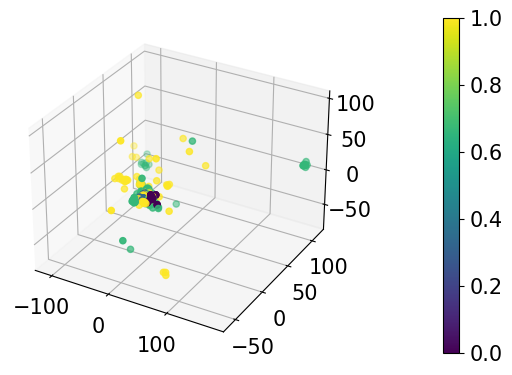

In [68]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

im = ax.scatter(full_trained_reduced[0:750, 0], full_trained_reduced[0:750, 1], full_trained_reduced[0:750, 2], c = labels.flatten()[0:750])
fig.colorbar(im, ax=ax)

## t-SNE

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_train_reduced = tsne.fit_transform(full_trained)

In [ ]:
X_train_reduced.shape

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

im = ax.scatter(X_train_reduced[0:750, 0], X_train_reduced[0:750, 1], c = labels.flatten()[0:750])
fig.colorbar(im, ax=ax)

In [72]:
tsne = TSNE(n_components=3)
X_train_reduced = tsne.fit_transform(full_trained)

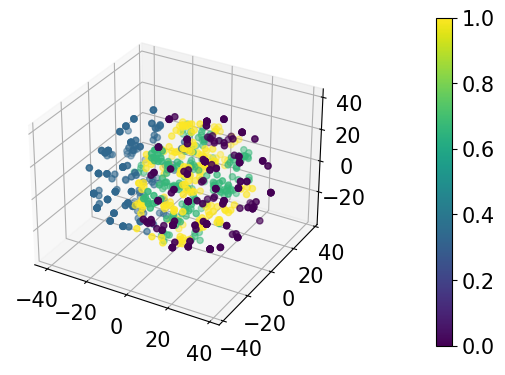

In [73]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

im = ax.scatter(X_train_reduced[0:750, 0], X_train_reduced[0:750, 1], X_train_reduced[0:750, 2], c = labels.flatten()[0:750])
fig.colorbar(im, ax=ax)

## UMAP

In [74]:
!pip install umap-learn

In [ ]:
from umap import UMAP

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

X_train_reduced = umap_2d.fit_transform(full_trained)
X_train_reduced = umap_3d.fit_transform(full_trained)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

im = ax.scatter(X_train_reduced[0:750, 0], X_train_reduced[0:750, 1], c = labels.flatten()[0:750])
fig.colorbar(im, ax=ax)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

im = ax.scatter(X_train_reduced[0:750, 0], X_train_reduced[0:750, 1], X_train_reduced[0:750, 2], c = labels.flatten()[0:750])
fig.colorbar(im, ax=ax)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_reduced[:, 0:2], labels.flatten(), test_size=0.2, random_state=42)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn import datasets, neighbors
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 4
clf = neighbors.KNeighborsClassifier(n_neighbors, weights="uniform")
clf.fit(X_train, y_train)

# Create color maps
cmap_light = ListedColormap(["orange", "cyan"])
cmap_bold = ["darkorange", "c"]

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    cmap=cmap_light,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    )

# Plot also the training points
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
  )

plt.title(
    "2-Class Classification (k = %i, weights = '%s')" % (n_neighbors, "uniform")
    )

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, neighbors

n_neighbors = 4
clf = neighbors.KNeighborsRegressor(n_neighbors, weights="uniform")
clf.fit(X_train, y_train)

# Create a mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, shading='auto', cmap='RdYlBu')

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20)
plt.title("4-Class Classification (k = %i, weights = '%s')" % (n_neighbors, "uniform"))
plt.show()


In [ ]:
print(f"train score: {clf.score(X_train, y_train)}")
print(f"test score: {clf.score(X_test, y_test)}")

In [ ]:

xtr, xte, ytr, yte = train_test_split(real_final, imag_final, test_size=0.2, random_state=42)

xtr.shape
ytr.shape
xte.shape
real_final.shape